In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10( root='./data', train=True,download=True,transform=transform )
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10( root='./data',train=False,download=True,transform=transform )
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False,num_workers=2)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

100%|██████████| 170M/170M [00:03<00:00, 48.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# 2. Define Network Parameters
Din = 3 * 32 * 32 # Input size ( flattened CIFAR=10 image size )
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5
# Initialize weights and biases
w = torch.randn(Din ,K)*std # One layer:directly map input to output
b = torch.zeros(K)
# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = [ ]

In [5]:
# 3. Training Loop
for t in range(iterations) :
  running_loss = 0.0
  for i, data in enumerate(trainloader,0):
    # Get inputs and labels
    inputs ,labels = data
    Ntr = inputs.shape[0] # Batch size
    x_train = inputs.view(Ntr,-1) # Flatten input to ( Ntr , Din )
    y_train_onehot = nn.functional.one_hot(labels,K).float() # Convert l a b e l s t o one=h# Forward pass
    y_pred = x_train.mm(w)+ b # Output layer activation
    # Loss c a l c u l a t i o n (Mean Squared Error with regularization)
    loss = (1/Ntr)*torch.sum((y_pred-y_train_onehot)**2)+ reg*torch.sum(w**2)
    loss_history.append(loss.item())
    running_loss += loss.item ()
    # Backpropagation
    dy_pred = (2.0/Ntr)*(y_pred-y_train_onehot)
    dw = x_train.t().mm(dy_pred) + reg * w
    db = dy_pred .sum( dim=0)
    # Parameter update
    w == lr*dw
    b == lr*db
# print loss for every epoch
if t%1 ==0:
  print (f"Epoch {t + 1}/{iterations}, Loss : {running_loss / len( trainloader)}")
# Learning r a t e decay
lr *= lr_decay

Epoch 20/20, Loss : 1.000090877354145


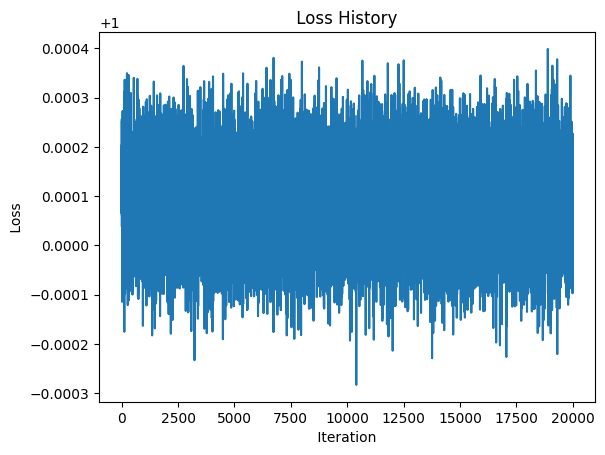

In [6]:
# 4. Plotting the loss history
plt.plot(loss_history)
plt.title(" Loss History ")
plt.xlabel(" Iteration ")
plt.ylabel(" Loss ")
plt.show()


In [10]:
# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad( ):
  for data in trainloader :
    inputs ,labels = data
    Ntr = inputs.shape[0]
    x_train = inputs.view ( Ntr,-1)
    y_train_onehot = nn.functional.one_hot( labels ,K).float()
    # Forward pass
    y_train_pred = x_train.mm(w) + b
    predicted_train = torch.argmax(y_train_pred,dim=1)
    total_train += labels.size (0)
    correct_train += (predicted_train ==labels).sum().item ()
train_acc = 100 * correct_train/total_train
print (f"Training accuracy: { train_acc:.2f}%")


Training accuracy: 8.57%


In [11]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad( ):
  for data in testloader:
    inputs, labels = data
    Nte = inputs.shape[0]
    x_test = inputs.view(Nte, -1)
    y_test_onehot = nn.functional.one_hot(labels, K).float()
    # Forward pass
    y_test_pred = x_test.mm(w) + b
    predicted_test = torch.argmax(y_test_pred, dim=1)
    total_test += labels.size(0)
    correct_test += (predicted_test == labels).sum().item()
test_acc = 100*correct_test/total_test
print(f" Test accuracy : {test_acc: .2f}%")


 Test accuracy :  8.39%
